<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Custom Evaluations</h1>

**What is Custom Evaluation?**: Custom evaluations can be performed by writing a prompt explaining a custom scenario to evaluate. This high level of customization enables assessment based on various factors, such as evaluating responses according to specific personas, determining relevance in relation to ground truth, and more.

For example, if the question asked is "How does a car start?" and the context provided is "When a driver turns the key or presses the ignition button, this action initiates the engine's rotation, and the fuel and ignition systems work together to start the combustion process, allowing the engine to run independently and the car starts." and the response is "A car starts by pressing the ignition button". You can use a custom evaluate to evaluate whether a student has answered the question currectly wrt the context and according score them.


**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description |
| ----------- | ----------- |
| prompt | Explanation of the evaluation |
| choice_strings | Basis for evaluation |

 
If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).
 

## Step 1: Install UpTrain by running 'pip install uptrain'

In [9]:
#!pip install uptrain

## Step 2: Let's define the custom evaluation scenario

In [1]:
prompt = """
You are an expert medical school professor specialized in grading students' answers to questions.
You are grading the following question:
{question}
Here is the real answer:
{ground_truth}
You are grading the following predicted answer:
{response}
Respond with CORRECT or INCORRECT or CORRECT BUT INCOMPLETE. Write down a step by step explanation for your selected choice.
"""

choice_strings = {'CORRECT':1.0 ,'CORRECT BUT INCOMPLETE':0.5, 'INCORRECT':0.0}

## Step 3: Let's define our dataset to run evaluations upon

In [2]:
data = [
   {
      "question": "What causes diabetes?",
      "ground_truth": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity."
   },
   {
      "question": "How is pneumonia treated?",
      "ground_truth": "Pneumonia is an infection that inflames the air sacs in one or both lungs. It is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity.",
      "response": "Pneumonia is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity."
   },
   {
      "question": "Is the flu vaccine effective?",
      "ground_truth": "The influenza vaccine is recommended to prevent seasonal flu. Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains.",
      "response": "Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains."
   },
   {
      "question": "What are the symptoms of a heart attack?",
      "ground_truth": "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
      "response": "Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back."
   },
   {
      "question": "Can stress cause physical health problems?",
      "ground_truth": "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
      "response": "Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system."
   }
]

## Step 4: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import CustomPromptEval, EvalLLM, Settings
import json

OPENAI_API_KEY = "sk-****************"  # Insert your OpenAI key here

eval_llm = EvalLLM(settings=Settings(openai_api_key=OPENAI_API_KEY, response_format={"type":"json_object"}))

results = eval_llm.evaluate(
    data = data,
    checks = [CustomPromptEval(prompt=prompt,
                             choice_strings = {'CORRECT':1.0 ,'CORRECT BUT INCOMPLETE':0.5, 'INCORRECT':0.0},
                             eval_type='cot_classify',        # choice of variables: classify - returns the choice and score ; cot_classify- returns the choice, score and explanation
                             context_vars=None
                             )]
)

2024-01-25 15:21:33.945 | INFO     | uptrain.framework.evalllm:evaluate:100 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(results,indent=3))

[
   {
      "question": "What causes diabetes?",
      "ground_truth": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "Choice": "CORRECT BUT INCOMPLETE",
      "Explanation": "The predicted answer correctly identifies the primary causes of diabetes as genetic and environmental factors, including obesity and lack of physical activity. However, it does not mention that diabetes is a metabolic disorder characterized by high blood sugar levels, which is an important aspect of the real answer.",
      "score_custom_prompt": 0.5
   },
   {
      "question": "How is pneumonia treated?",
      "ground_truth": "Pneumonia is an infection that inflames the air sacs in one or both lun

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [6]:
from uptrain import APIClient, CustomPromptEval
import json

UPTRAIN_API_KEY = "up-******************"  # Insert your UpTrain key here

uptrain_client = APIClient(Settings(uptrain_access_token=UPTRAIN_API_KEY, response_format={"type":"json_object"}))

results = uptrain_client.log_and_evaluate(
    project_name = "Sample-custom-evals",
    data = data[:10],
    checks=[CustomPromptEval(prompt=prompt,
                             choice_strings = {'CORRECT':1.0 ,'CORRECT BUT INCOMPLETE':0.5, 'INCORRECT':0.0},
                             eval_type='cot_classify',        # choice of variables: classify - returns the choice and score ; cot_classify- returns the choice, score and explanation
                             context_vars=None
                             )]
   
)

2024-01-25 15:22:53.799 | INFO     | uptrain.framework.remote:log_and_evaluate:507 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [7]:
print(json.dumps(results,indent=3))

[
   {
      "question": "What causes diabetes?",
      "ground_truth": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "Choice": "CORRECT BUT INCOMPLETE",
      "Explanation": "The predicted answer correctly identifies the primary causes of diabetes as genetic and environmental factors, including obesity and lack of physical activity. However, it does not mention that diabetes is a metabolic disorder characterized by high blood sugar levels, which is an important aspect of the real answer.",
      "score_custom_prompt": 0.5
   },
   {
      "question": "How is pneumonia treated?",
      "ground_truth": "Pneumonia is an infection that inflames the air sacs in one or both lun

### Dashboards: 
Histogram of score vs number of cases with that score

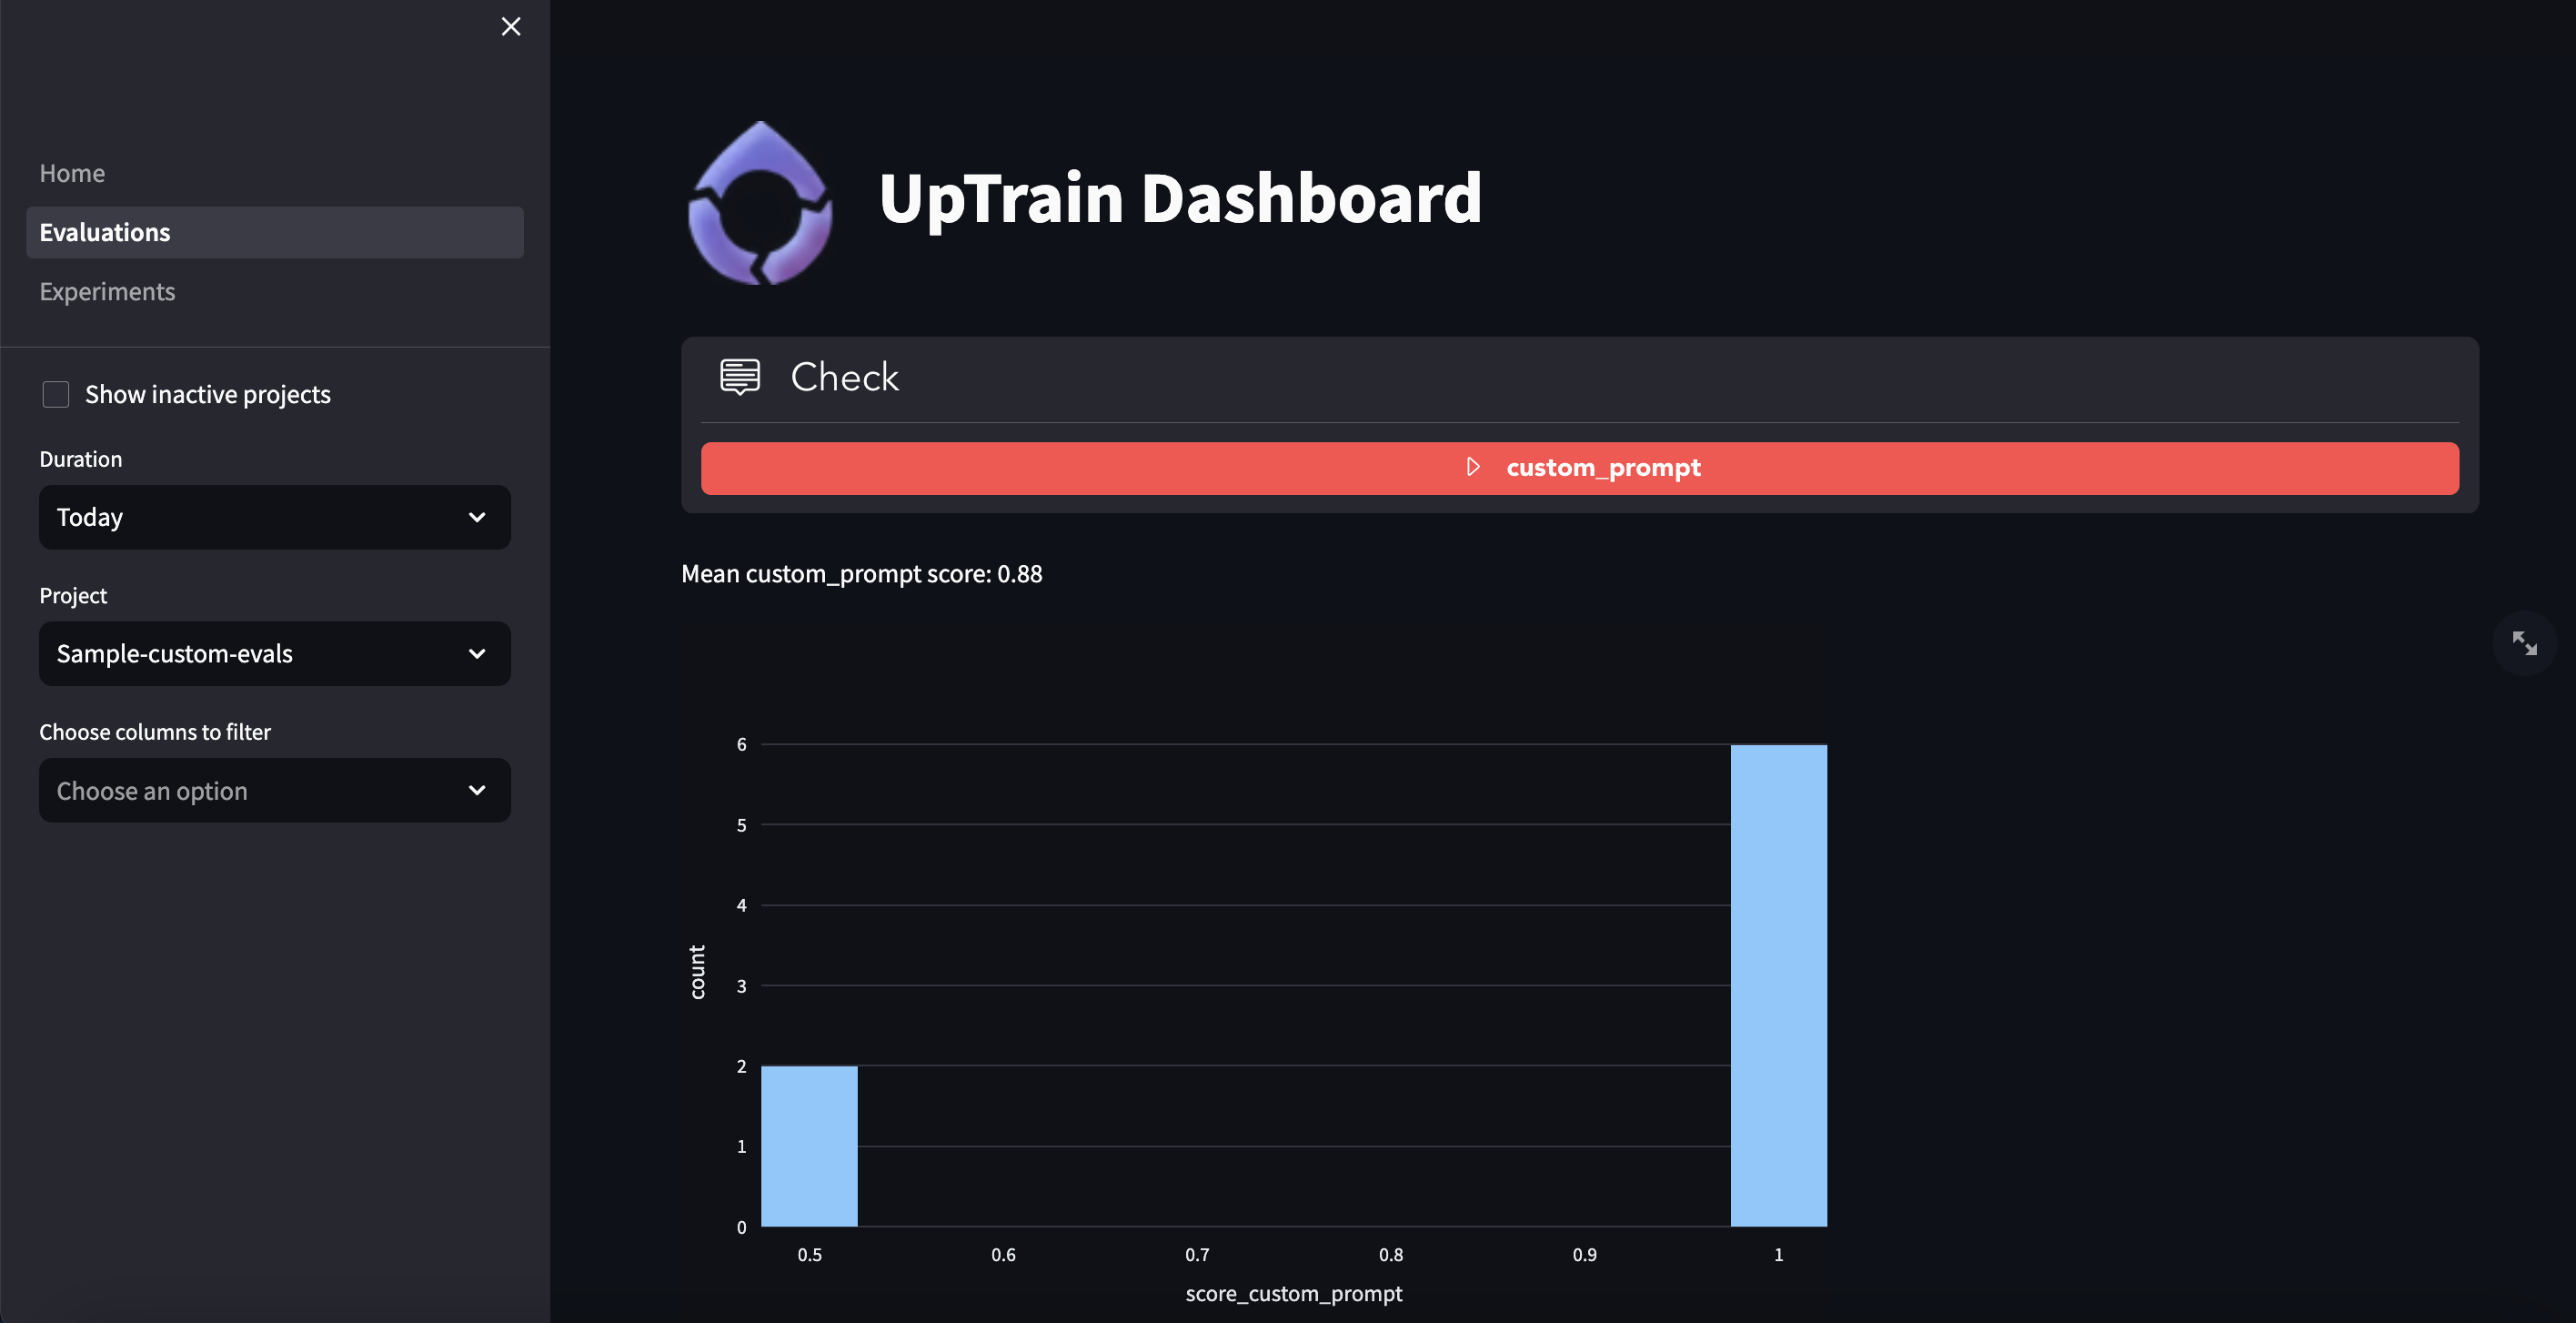

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

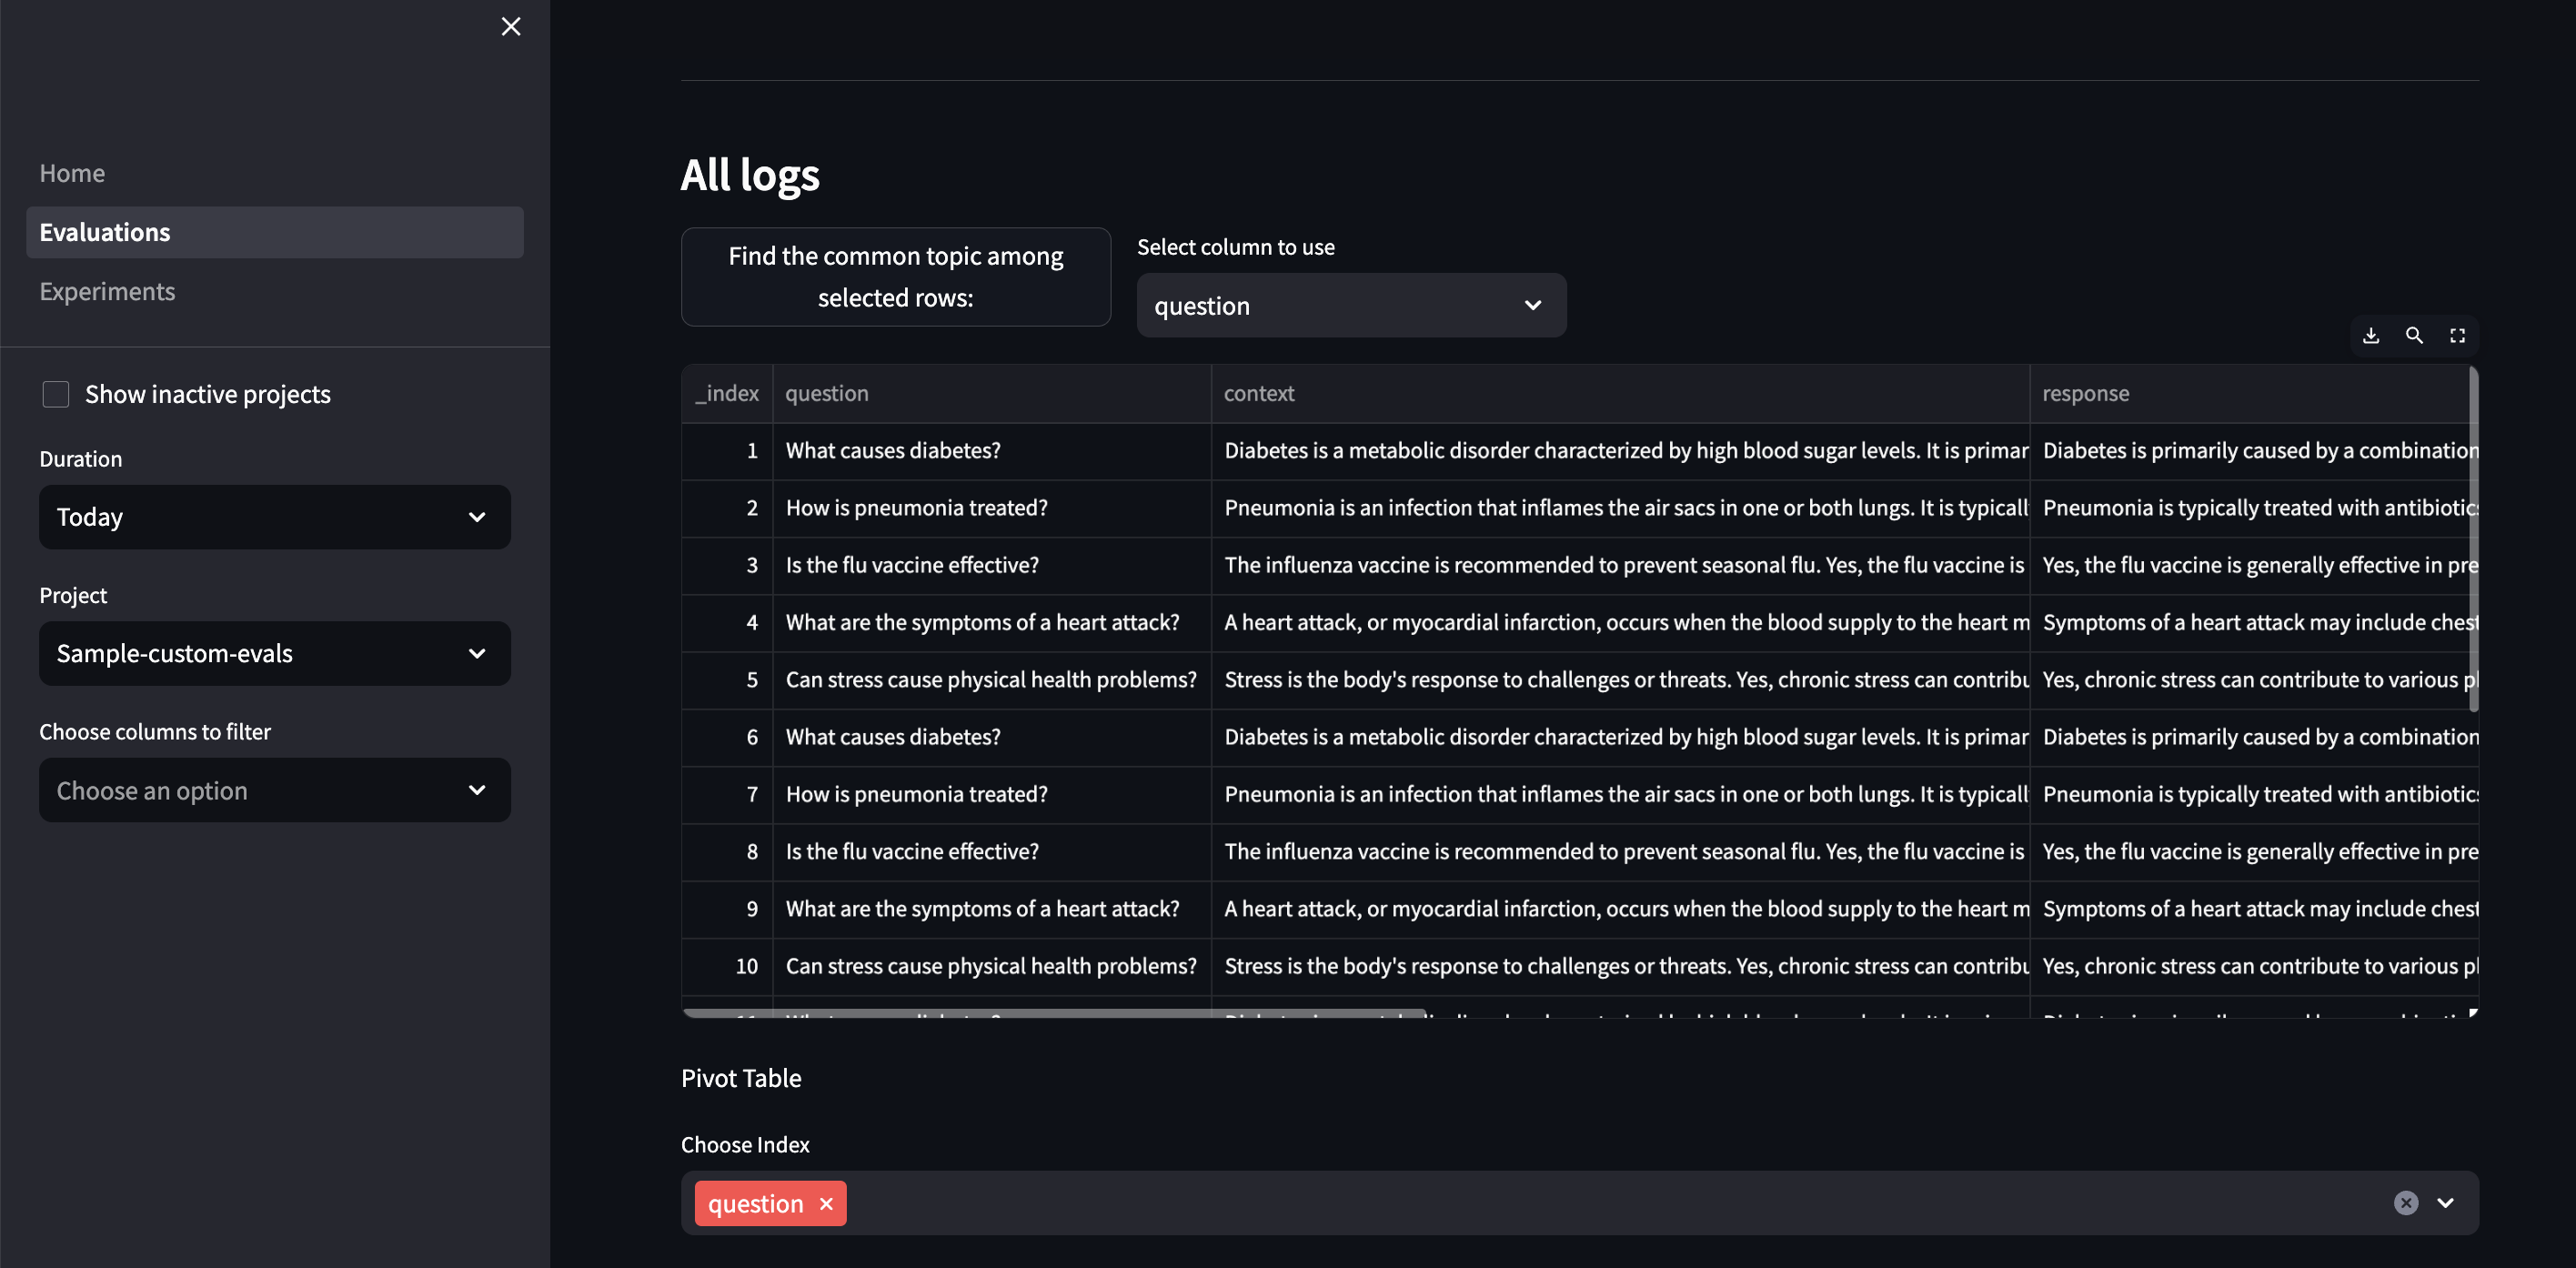